In [20]:
# based on https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training label shape: ", y_train.shape) 
print("First 5 training labels: ", y_train[:5]) 

image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)


num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])


Training label shape:  (60000,)
First 5 training labels:  [5 0 4 1 9]
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [21]:
from keras.layers import Dense, Dropout # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

image_size = 784 # 28*28
num_classes = 10 # ten unique digits
layers_dims=[20,7,5,10]
p = 0.5 # for dropout

model = Sequential([
    Dense(units=20, input_shape=(image_size,), activation='relu'),
#     Dropout(p),
    Dense(units=7, activation='relu'),
#     Dropout(p),
    Dense(units=5, activation='relu'),
#     Dropout(p),
    Dense(units=10, activation='softmax'),
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_26 (Dense)             (None, 7)                 147       
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_28 (Dense)             (None, 10)                60        
Total params: 15,947
Trainable params: 15,947
Non-trainable params: 0
_________________________________________________________________


In [22]:
def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.2, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_26 (Dense)             (None, 7)                 147       
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_28 (Dense)             (None, 10)                60        
Total params: 15,947
Trainable params: 15,947
Non-trainable params: 0
_________________________________________________________________


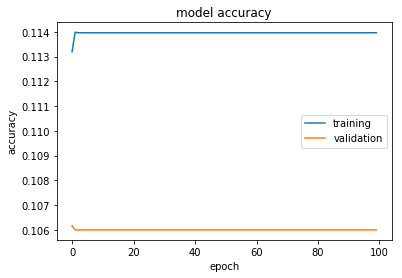


Test loss: 2.3
Test accuracy: 0.114


In [23]:
evaluate(model, batch_size=64, epochs=100)